In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

In [100]:
x = np.atleast_2d([1.0, 3.0, 5.0, 6.0, 7.0, 8.0])
y = np.sin(x)
x_test = np.atleast_2d(np.arange(-2, 10.1, .1))

In [160]:
def plot(x, y, x_test, y_mu, y_sigma, title):
    upper = y_mu.squeeze() + np.diag(y_sigma)
    lower = y_mu.squeeze() - np.diag(y_sigma)
#     upper = y_mu + y_sigma
#     lower = y_mu - y_sigma
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(x.T, y.T)
    line, = plt.plot(x_test.T, y_mu)
    plt.ylim([-1.5, 2])
    plt.xlim([-3, 11])
    filling = plt.gca().fill_between(x_test.T.squeeze(), upper, lower, color='steelblue', alpha=.4)
    plt.legend((line, filling), ['Mean', 'Variance'])
    plt.title(title)

In [162]:
def k_linear(a, b):
    n = noise if a.T.shape[0] is b.T.shape[0] else 0.
    return np.dot(a.T, b) + np.eye(a.T.shape[0], b.T.shape[0]) * n

def k_rbf(a, b, bandwidth=1):
    n = noise if a.T.shape[0] is b.T.shape[0] else 0.
    return np.exp(-np.square((a.T - b)) / (bandwidth * 2)) + np.eye(a.T.shape[0], b.T.shape[0]) * n
    
def k_poly(a, b, deg=3):
    n = noise if a.T.shape[0] is b.T.shape[0] else 0.
    return np.power(np.dot(a.T, b) + 1, deg) + np.eye(a.T.shape[0], b.T.shape[0]) * n

def mu_prime(kernel, x, x_test, end):
    return np.dot(kernel(x_test, x), end)

def sigma_prime(kernel, x, x_test, inv):
    test_mat = kernel(x_test, x_test)
    test_x = kernel(x_test, x)
    back = np.dot(test_x, np.dot(inv, test_x.T))
    return test_mat - back

def gp_dist(kernel, x, y, x_test):
    inv = np.linalg.pinv(kernel(x, x))
    end = np.dot(inv, y.T)
    mu_p = mu_prime(kernel, x, x_test, end)
    sigma_p = sigma_prime(kernel, x, x_test, inv)
    return mu_p, sigma_p

In [133]:
def gp_regressor(kernel):
    y_mus, y_sigmas = [], []
    for i in range(x_test.shape[1]):
        y_mu, y_sigma = gp_dist(kernel, x, y, x_test[:,i])
        y_mus.append(y_mu.squeeze())
        y_sigmas.append(y_sigma.squeeze())
    y_mus = np.array(y_mus)
    y_sigmas = np.array(y_sigmas)
    return y_mus, y_sigmas

## Results

Part 1: Noiseless

In [163]:
noise = 0.

In [164]:
mu, sigma = gp_dist(k_linear, x, y, x_test)

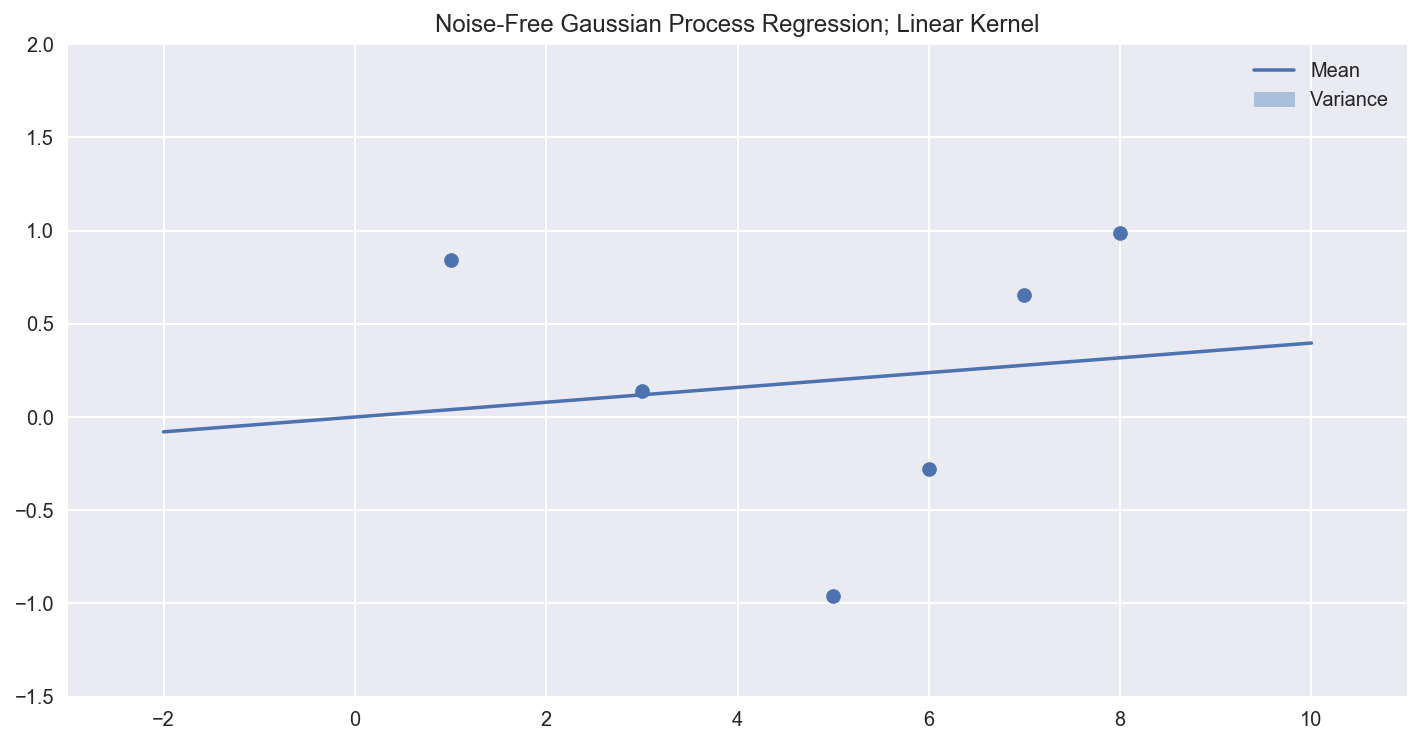

In [167]:
plot(x, y, x_test, mu, sigma, "Noise-Free Gaussian Process Regression; Linear Kernel")

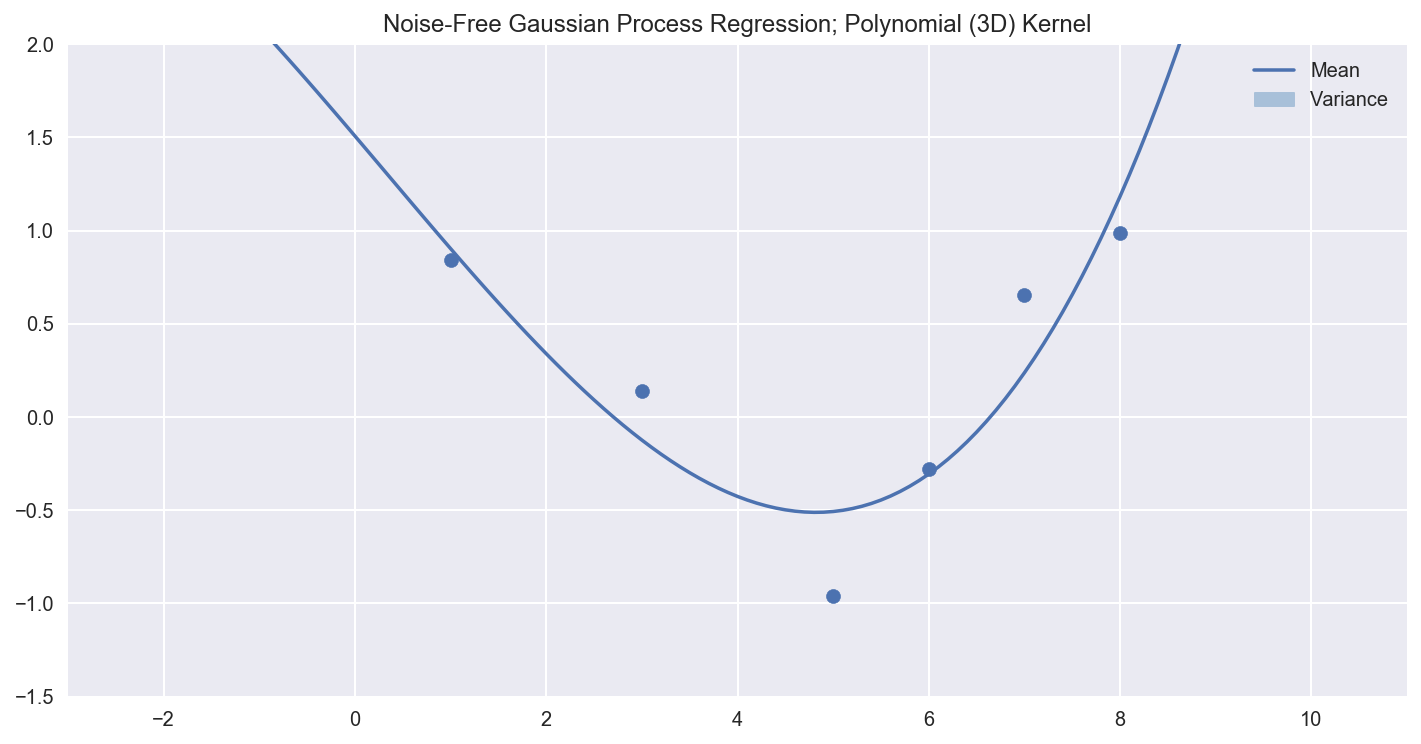

In [169]:
plot(x, y, x_test, *gp_dist(k_poly, x, y, x_test), "Noise-Free Gaussian Process Regression; Polynomial (3D) Kernel")

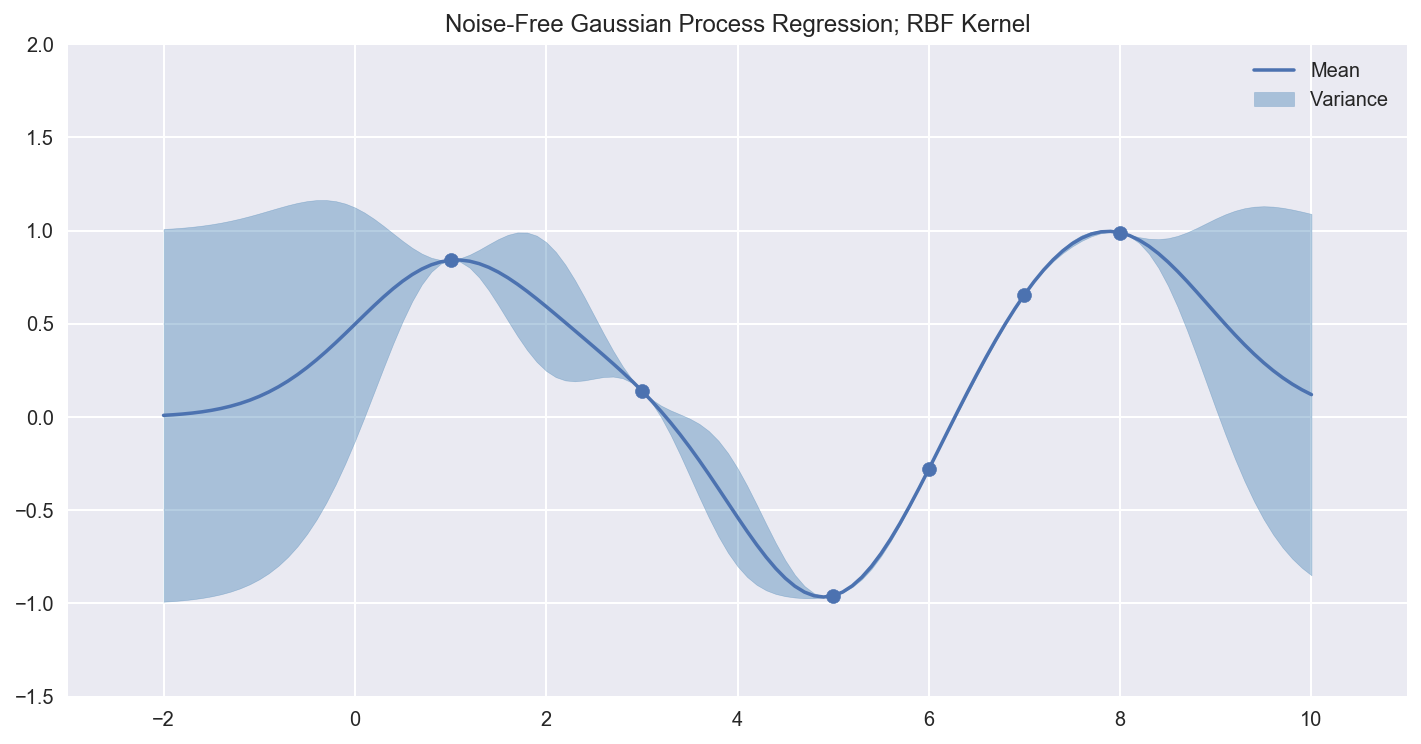

In [170]:
plot(x, y, x_test, *gp_dist(k_rbf, x, y, x_test), "Noise-Free Gaussian Process Regression; RBF Kernel")

Part 2: Noisy

In [172]:
noise = 0.1

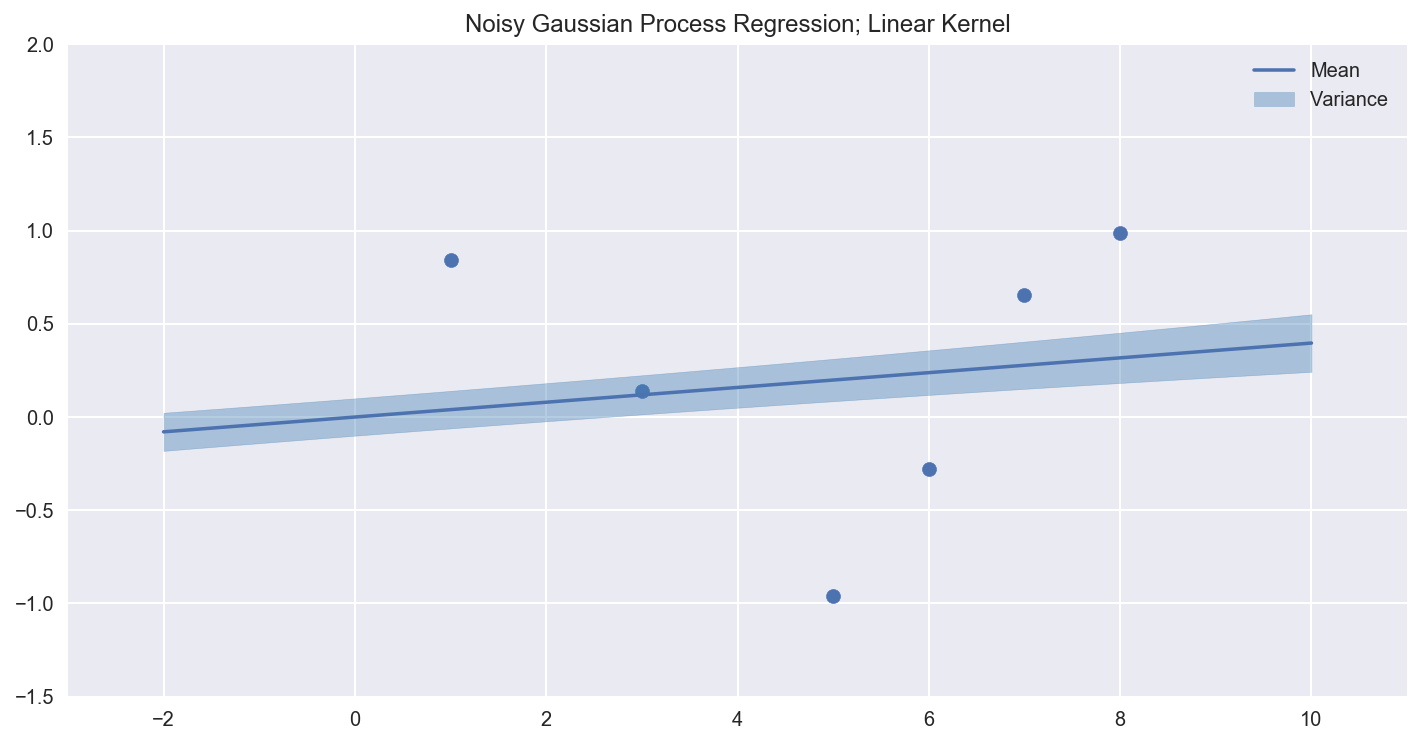

In [174]:
plot(x, y, x_test, *gp_dist(k_linear, x, y, x_test), "Noisy Gaussian Process Regression; Linear Kernel")

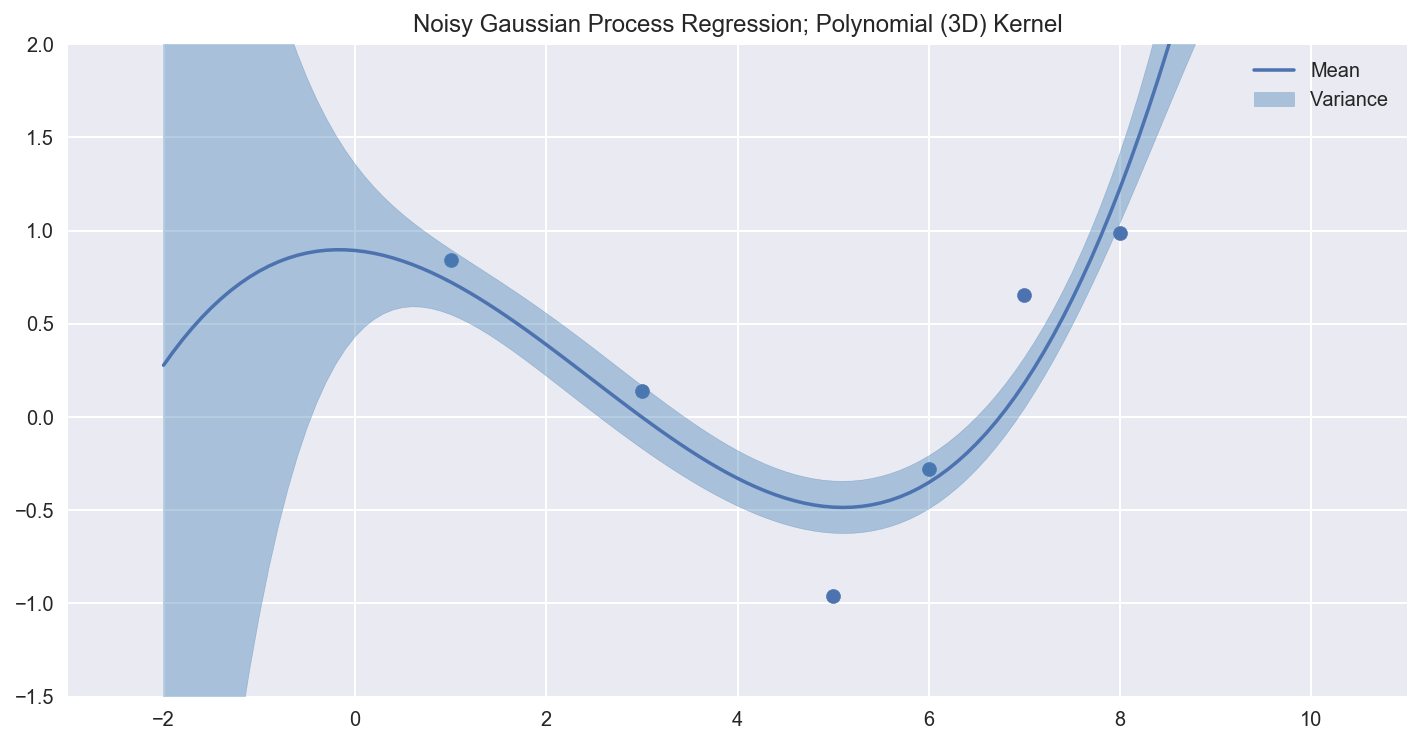

In [177]:
plot(x, y, x_test, *gp_dist(k_poly, x, y, x_test), "Noisy Gaussian Process Regression; Polynomial (3D) Kernel")

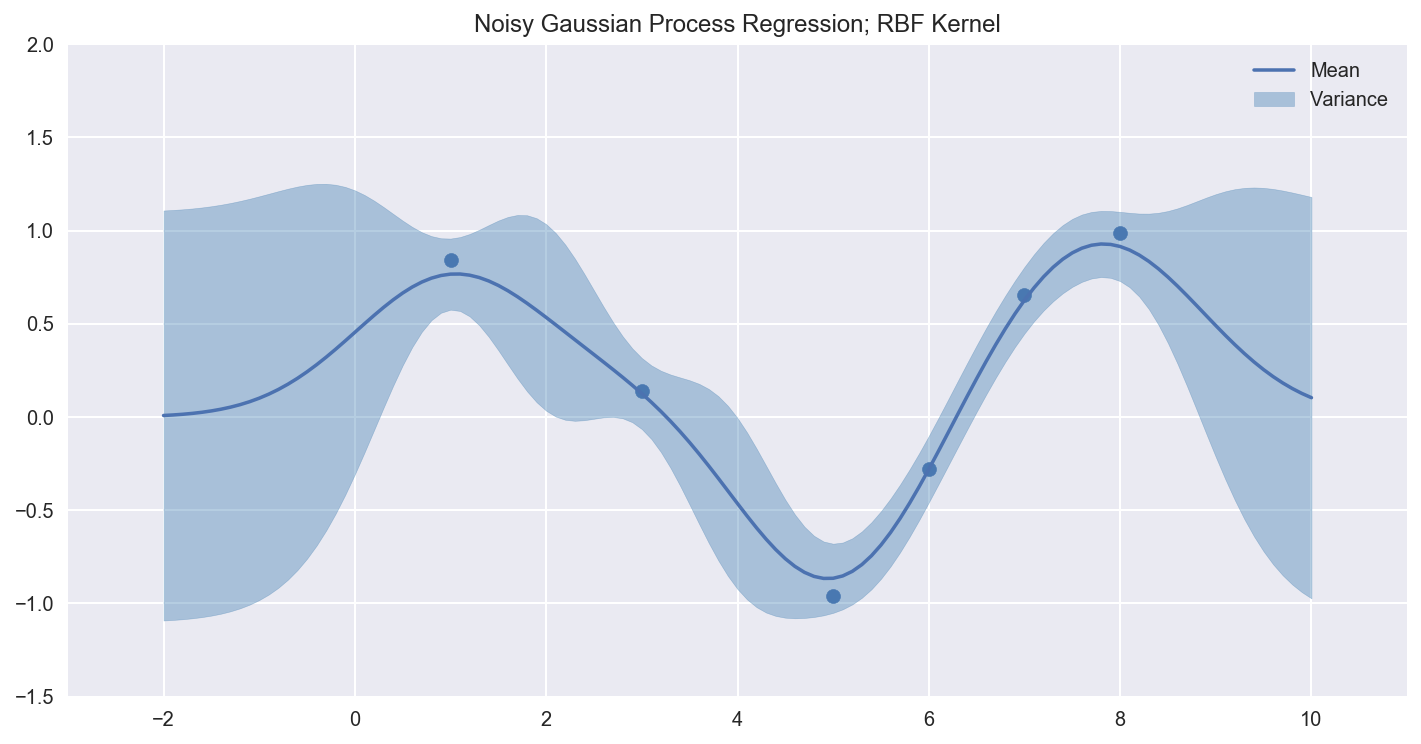

In [178]:
plot(x, y, x_test, *gp_dist(k_rbf, x, y, x_test), "Noisy Gaussian Process Regression; RBF Kernel")

Answers to questions:
- What happens when the bandwidth parameter \sigma_n of the Gaussian kernel gets small? Gets large?
When it gets small, the functions vary to an absurd degree, giving huge variations and a mean that is highly overfit, always at the mean except for when at a specific point. when it jerks up or down. When large the variance of function is much much smaller.
- What happens when the degree M of the polynomial kernel gets small? Gets large?
When it's small, it's less able to fit the data. When large, it becomes overly complicated and overfits the data with a much greater variance of functions.